In [1]:
from fastbook import *

In [20]:
url = search_images_ddg('birds', max_images=2)
url

(#2) ['https://wallpapercave.com/wp/wp4531692.jpg','https://i.pinimg.com/originals/3c/cd/32/3ccd3270790c481ce77e4ecd31034186.jpg']

In [8]:
dest = 'bird.jpg'
download_url(url[0], dest, show_progress=True)

Path('bird.jpg')

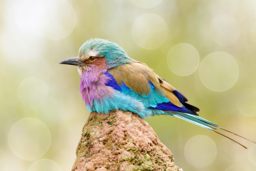

In [11]:
im = Image.open(dest)
im.to_thumb(256,256)

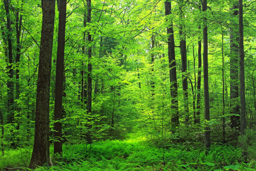

In [13]:
download_url(search_images_ddg('forest', max_images=1)[0], 'forest.png', show_progress=True)
Image.open('forest.png').to_thumb(256,256)

In [41]:
searches = ['forest','birds']
root_folder = Path('bird_or_not')

for x in searches:
    dest = (root_folder/x)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest=dest, urls=search_images_ddg(f'{x} photo', max_images=25))
    resize_images(dest, max_size=400, dest=dest)

In [42]:
failed = verify_images(get_image_files(path=root_folder))
failed.map(Path.unlink)
len(failed)

0

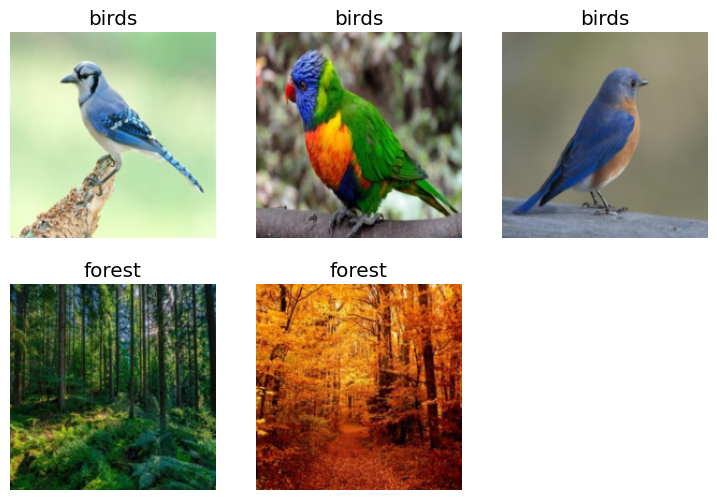

In [43]:
dls = DataBlock(blocks=(ImageBlock, CategoryBlock),
                get_items = get_image_files,
                splitter = RandomSplitter(valid_pct=0.2, seed=42),
                get_y = parent_label, 
                item_tfms=[Resize(192, method='squish')]).dataloaders(root_folder, bs=5)


dls.show_batch(max_n=5)

In [44]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.776643,0.002137,0.000000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.171007,0.001803,0.000000,00:06
1,0.155194,0.001130,0.000000,00:06
2,0.218009,0.000729,0.000000,00:06
3,0.200594,0.002739,0.000000,00:06
4,0.139215,0.000832,0.000000,00:06


In [46]:
is_bird, _, prob = learn.predict(PILImage.create('forest.png'))

In [47]:
is_bird, _, prob

('forest', tensor(1), tensor([8.4141e-08, 1.0000e+00]))